In [1]:
### Importing Libraries

import numpy as np
import pandas as pd

### Reading Dataset

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv', header=0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### Loading data with parse data

In [5]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


### Loading Data as a Series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

### Exploring Time Series Data

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Quering by Time

In [12]:
print(series['1959-02'])

date
1959-02-01    23
1959-02-02    31
1959-02-03    44
1959-02-04    38
1959-02-05    50
1959-02-06    38
1959-02-07    51
1959-02-08    31
1959-02-09    31
1959-02-10    51
1959-02-11    36
1959-02-12    45
1959-02-13    51
1959-02-14    34
1959-02-15    52
1959-02-16    47
1959-02-17    45
1959-02-18    46
1959-02-19    39
1959-02-20    48
1959-02-21    37
1959-02-22    35
1959-02-23    52
1959-02-24    42
1959-02-25    45
1959-02-26    39
1959-02-27    37
1959-02-28    30
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-02-01') & (df2['date'] <= '1959-02-28')]

,date,births
32,1959-02-02,31
33,1959-02-03,44
34,1959-02-04,38
35,1959-02-05,50
36,1959-02-06,38
37,1959-02-07,51
38,1959-02-08,31
39,1959-02-09,31
40,1959-02-10,51
41,1959-02-11,36


### Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Data Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
viz = df2.copy()

In [18]:
viz.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


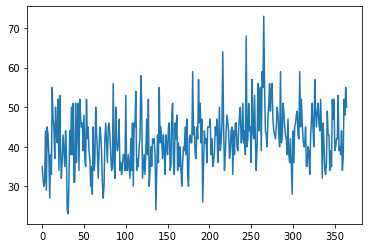

In [19]:
viz['births'].plot();

In [20]:
# making date to index value
viz.index = viz['date']

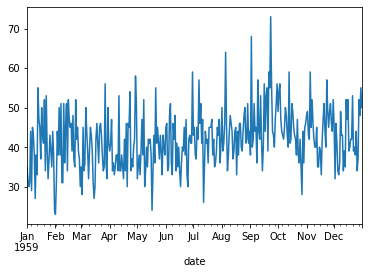

In [21]:
# plotting the data with date as x axis
viz['births'].plot();

#### Zooming In

In [22]:
viz2 = viz[(viz['date'] > '1959-01-01') & (viz['date'] <= '1959-01-10')].copy()

In [23]:
viz2.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


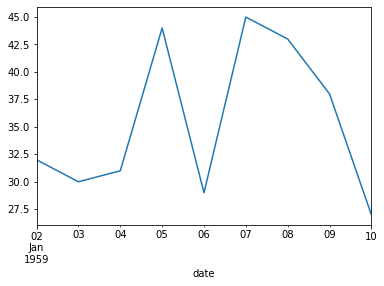

In [24]:
viz2['births'].plot();

#### Tredline

In [25]:
import seaborn as sns

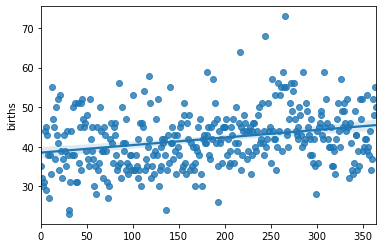

In [26]:
sns.regplot(x=df2.index.values, y=df2['births']);

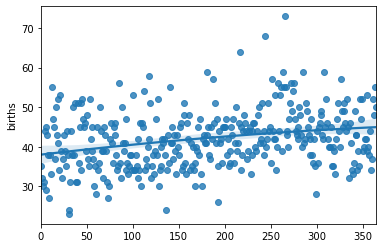

In [27]:
sns.regplot(x=df2.index.values, y=df2['births'], order=2);

In [28]:
# new DataFrame with another dataset
milesDF = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [29]:
milesDF.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


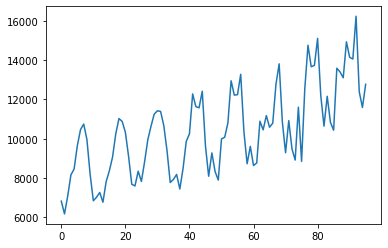

In [30]:
milesDF['MilesMM'].plot();

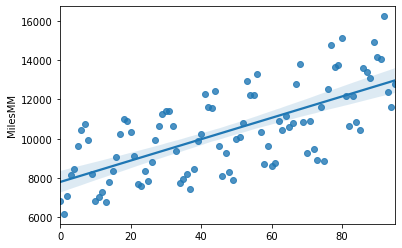

In [31]:
sns.regplot(x=milesDF.index.values, y=milesDF['MilesMM']);

#### Removing Seasonality

In [32]:
milesDF['year'] = milesDF['Month'].dt.year

In [33]:
milesDF.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [34]:
milesDF.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

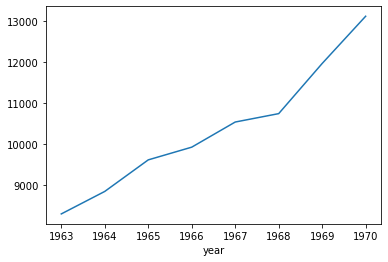

In [35]:
milesDF.groupby('year')['MilesMM'].mean().plot();

#### Creating Lag-Plots

In [36]:
milesDF['lag1'] = milesDF['MilesMM'].shift(1)

In [37]:
milesDF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


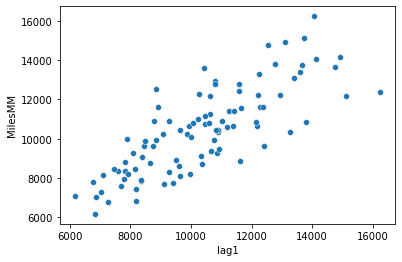

In [38]:
sns.scatterplot(x=milesDF['lag1'], y=milesDF['MilesMM']);

In [39]:
from pandas.plotting import lag_plot

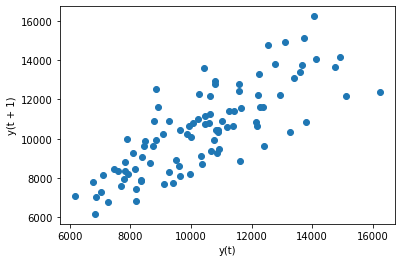

In [40]:
lag_plot(milesDF['MilesMM']);

#### AutoCorrelation Plots

In [41]:
from pandas.plotting import autocorrelation_plot

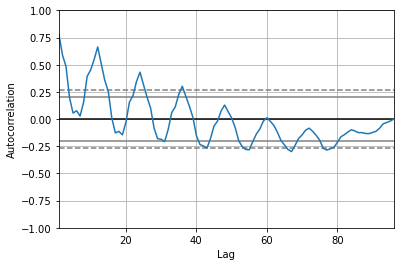

In [42]:
autocorrelation_plot(milesDF['MilesMM']);

### Feature Engineering

#### Date Time Features

In [43]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [44]:
features = df2

In [45]:
features['year'] = df2['date'].dt.year

In [46]:
features['month'] = df2['date'].dt.month

In [47]:
features['day'] = df2['date'].dt.day

In [48]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


#### Lag Features

In [49]:
features['lag1'] = df2['births'].shift(1)

In [50]:
features['lag2'] = df2['births'].shift(365)

In [51]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [52]:
features.tail()

,date,births,year,month,day,lag1,lag2
360,1959-12-27,37,1959,12,27,34.0,NaN
361,1959-12-28,52,1959,12,28,37.0,NaN
362,1959-12-29,48,1959,12,29,52.0,NaN
363,1959-12-30,55,1959,12,30,48.0,NaN
364,1959-12-31,50,1959,12,31,55.0,NaN


#### Window Features

In [53]:
features['Roll_mean'] = df2['births'].rolling(window=2).mean()

In [54]:
features['Roll_max'] = df2['births'].rolling(window=3).max()

In [55]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


#### Expanding Features

In [56]:
features['Expand_max'] = df2['births'].expanding().max()

In [57]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


### Upsampling and Downsampling

In [58]:
milesDF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


#### Downsampling

In [59]:
quarterlyMilesDF = milesDF.resample('Q', on='Month').mean()

In [60]:
quarterlyMilesDF.head()

,MilesMM,year,lag1
Month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


In [61]:
yearlyTotalMilesDF = milesDF.resample('A', on='Month').sum()

In [62]:
yearlyTotalMilesDF.head()

,MilesMM,year,lag1
Month,,,
1963-12-31,99603,23556,92576.0
1964-12-31,106192,23568,105617.0
1965-12-31,115431,23580,115100.0
1966-12-31,119154,23592,117807.0
1967-12-31,126515,23604,126181.0


#### Upsampling

In [63]:
upsampledMilesDF = milesDF.resample('D', on='Month').mean()

In [64]:
upsampledMilesDF.head(40)

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN
1963-01-06,NaN,NaN,NaN
1963-01-07,NaN,NaN,NaN
1963-01-08,NaN,NaN,NaN
1963-01-09,NaN,NaN,NaN


In [65]:
interpolatedMilesDF = upsampledMilesDF.interpolate(method='linear')

In [66]:
interpolatedMilesDF.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.0,NaN
1963-01-02,6806.064516,1963.0,NaN
1963-01-03,6785.129032,1963.0,NaN
1963-01-04,6764.193548,1963.0,NaN
1963-01-05,6743.258065,1963.0,NaN


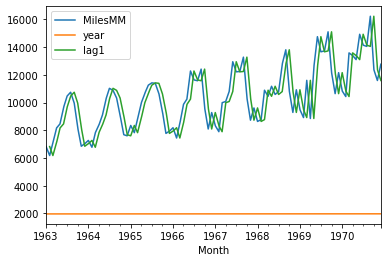

In [67]:
interpolatedMilesDF.plot();

In [68]:
polyInterpolatedMilesDF = upsampledMilesDF.interpolate(method='spline', order=2)

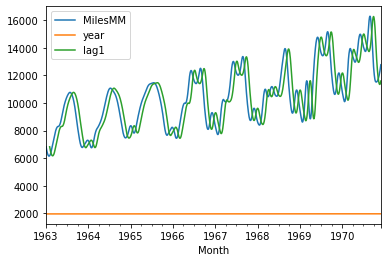

In [69]:
polyInterpolatedMilesDF.plot();

In [70]:
polyInterpolatedMilesDF.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.000000,NaN
1963-01-02,6775.328886,1962.607682,NaN
1963-01-03,6725.739829,1962.610377,NaN
1963-01-04,6678.197709,1962.613071,NaN
1963-01-05,6632.702526,1962.615766,NaN


### Decomposing Time Series

**Time Series Data is combination of four diffrent parts**

- Level
- Trend
- Seasonality
- Noise

**Additive Model**

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model**

y(t) = Level * Trend * Seasonality * Noise

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
milesDecomposeDF = milesDF

In [73]:
milesDecomposeDF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [74]:
milesDecomposeDF.index = milesDecomposeDF['Month']

In [75]:
result = seasonal_decompose(milesDecomposeDF['MilesMM'], model='additive')

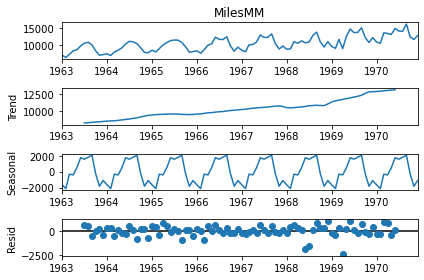

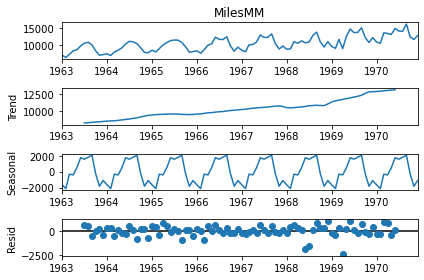

In [76]:
result.plot()

In [77]:
result2 = seasonal_decompose(milesDecomposeDF['MilesMM'], model='multiplicative')

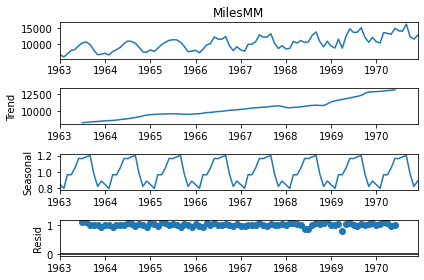

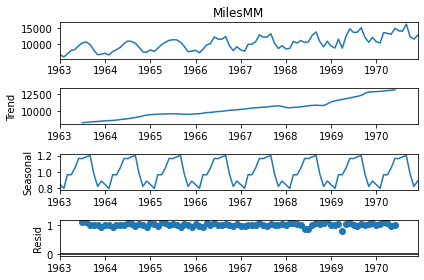

In [78]:
result2.plot()

### Differencing

In [79]:
milesData = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [80]:
milesData.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [81]:
milesData['lag1'] = milesData['MilesMM'].shift(1)

In [82]:
milesData['MilesMM_diff_1'] = milesData['MilesMM'].diff(periods=1)

In [83]:
milesData.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


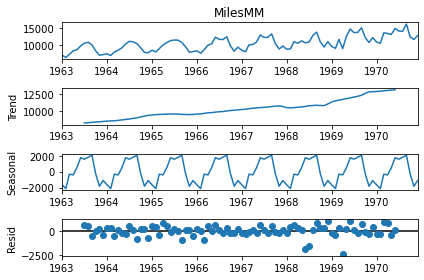

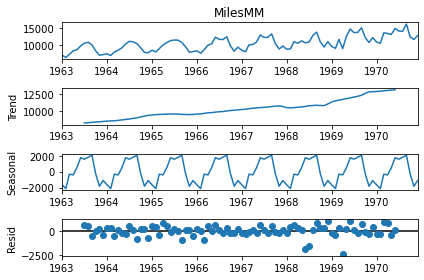

In [84]:
milesData.index = milesData['Month']
resultA = seasonal_decompose(milesData['MilesMM'], model='additive')
resultA.plot()

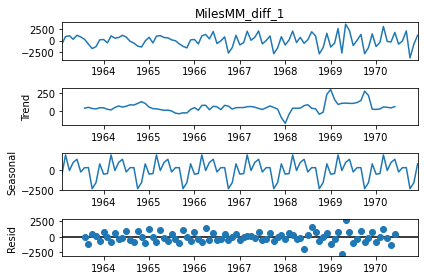

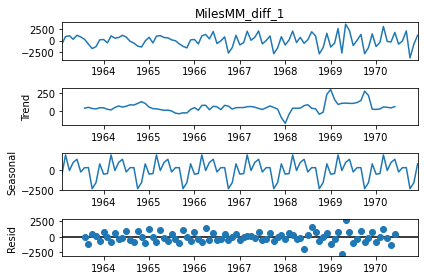

In [85]:
milesData.index = milesData['Month']
resultB = seasonal_decompose(milesData.iloc[1:, 3], model='additive')
resultB.plot()

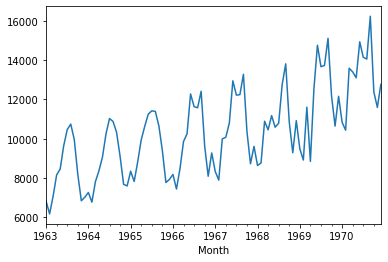

In [86]:
milesData['MilesMM'].plot();

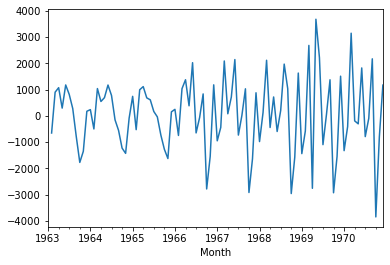

In [87]:
milesData['MilesMM_diff_1'].plot();

In [88]:
milesData['MilesMM_diff_12'] = milesData['MilesMM_diff_1'].diff(periods=12)

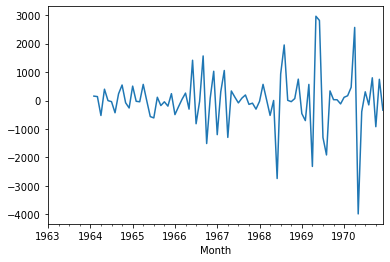

In [89]:
milesData['MilesMM_diff_12'].plot();

In [93]:
milesData.head(20)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


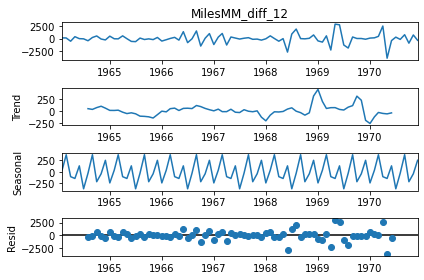

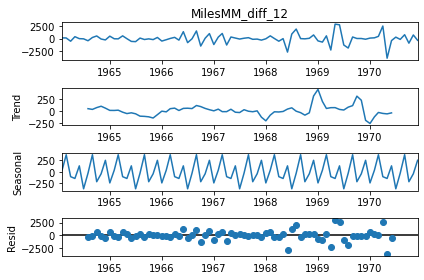

In [94]:
resultC = seasonal_decompose(milesData.iloc[13:, 4], model='additive')
resultC.plot()